<a href="https://colab.research.google.com/github/aeleraqi/DataVIZ_Tool/blob/main/DataVIZ_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas
!pip install plotly
!pip install openpyxl
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import sys

# Function to load dataset
def load_data():
    print("Choose a dataset:")
    print("1. Upload your own CSV file")
    choice = input("Enter 1: ")

    if choice == '1':
        try:
            file_path = input("Enter the path to your CSV file: ")
            return pd.read_csv(file_path)
        except Exception as e:
            print(f"Error loading file: {e}")
            sys.exit()
    else:
        print("Invalid choice. Exiting.")
        sys.exit()

# Function to handle user inputs and display available variables
def get_variables(data):
    print("Available variables (columns):")
    print(data.columns.tolist())

    while True:
        x_vars = input("Enter the variables for the x-axis (comma separated): ").split(',')
        x_vars = [x.strip() for x in x_vars]  # Clean whitespace

        if all(var in data.columns for var in x_vars):
            break
        else:
            print(f"Invalid columns: {', '.join(set(x_vars) - set(data.columns))}. Try again.")

    y_var = input("Enter the variable for the y-axis: ")
    if y_var not in data.columns:
        print(f"Invalid column: {y_var}. Exiting.")
        sys.exit()

    return x_vars, y_var

# Function to select theme
def select_theme():
    print("\nChoose a theme for the chart:")
    print("1. Plotly (default)")
    print("2. ggplot2")
    print("3. Seaborn")
    print("4. White")
    print("5. Dark")
    print("6. Minimal")

    theme_choice = input("Enter the number corresponding to the theme: ")

    themes = {
        '1': 'plotly',
        '2': 'ggplot2',
        '3': 'seaborn',
        '4': 'white',
        '5': 'dark',
        '6': 'minimal'
    }

    return themes.get(theme_choice, 'plotly')  # Default to 'plotly'

# Function to handle chart selection and generate plots
def generate_chart(data, x_vars, y_var, theme):
    print("\nChoose a chart type:")
    print("1. Scatter plot")
    print("2. Line plot")
    print("3. Bar plot")
    print("4. Histogram")
    print("5. Box plot")
    print("6. Area plot")
    print("7. Pie chart")
    print("8. Heatmap")
    print("9. Violin plot")
    print("10. Bubble chart")

    chart_type = input("Enter the number corresponding to the chart type: ")

    # Customizations (title, subtitle, footer)
    title = input("Enter the title for the chart (optional, press Enter to skip): ")
    subtitle = input("Enter a subtitle (optional, press Enter to skip): ")
    footer = input("Enter footer text (optional, press Enter to skip): ")

    # Create plot based on user choice
    fig = None

    if chart_type == '1':
        # Scatter plot
        fig = px.scatter(data, x=x_vars[0], y=y_var, title=title)

    elif chart_type == '2':
        # Line plot
        fig = px.line(data, x=x_vars[0], y=y_var, title=title)

    elif chart_type == '3':
        # Bar plot
        fig = px.bar(data, x=x_vars[0], y=y_var, title=title)

    elif chart_type == '4':
        # Histogram
        fig = px.histogram(data, x=x_vars[0], title=title)

    elif chart_type == '5':
        # Box plot
        fig = px.box(data, x=x_vars[0], y=y_var, title=title)

    elif chart_type == '6':
        # Area plot
        fig = px.area(data, x=x_vars[0], y=y_var, title=title)

    elif chart_type == '7':
        # Pie chart
        fig = px.pie(data, names=x_vars[0], values=y_var, title=title)

    elif chart_type == '8':
        # Heatmap (only for correlation matrix)
        fig = px.imshow(data.corr(), title='Correlation Matrix')

    elif chart_type == '9':
        # Violin plot
        fig = px.violin(data, y=y_var, x=x_vars[0], title=title)

    elif chart_type == '10':
        # Bubble chart
        fig = px.scatter(data, x=x_vars[0], y=y_var, size=x_vars[1], title=title)

    else:
        print("Invalid chart type selected.")
        return

    # Add title, subtitle, and footer
    if title:
        fig.update_layout(title_text=title, title_x=0.5)

    if subtitle:
        fig.add_annotation(text=subtitle, xref="paper", yref="paper",
                           x=0.5, y=1.1, showarrow=False)

    if footer:
        fig.add_annotation(text=footer, xref="paper", yref="paper",
                           x=0.5, y=-0.1, showarrow=False)

    # Show the figure
    fig.show()

    # Option to save the plot as PNG
    save_option = input("Would you like to save the plot as a PNG? (y/n): ")
    if save_option.lower() == 'y':
        filename = input("Enter the filename (without extension): ")
        pio.write_image(fig, f"{filename}.png")
        print(f"Plot saved as {filename}.png")

    # Option to save the chart data as an Excel file
    save_data_option = input("Would you like to save the chart data as an Excel file? (y/n): ")
    if save_data_option.lower() == 'y':
        excel_filename = input("Enter the Excel filename (without extension): ")
        data.to_excel(f"{excel_filename}.xlsx", index=False)
        print(f"Data saved as {excel_filename}.xlsx")

# Main function to run the program
def main():
    data = load_data()
    x_vars, y_var = get_variables(data)
    theme = select_theme()  # Select a theme via input
    generate_chart(data, x_vars, y_var, theme)

if __name__ == "__main__":
    main()


Choose a dataset:
1. Upload your own CSV file
Enter 1: 1
Enter the path to your CSV file: /content/Housing.csv
Available variables (columns):
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Enter the variables for the x-axis (comma separated): bedrooms
Enter the variable for the y-axis: price

Choose a theme for the chart:
1. Plotly (default)
2. ggplot2
3. Seaborn
4. White
5. Dark
6. Minimal
Enter the number corresponding to the theme: 5

Choose a chart type:
1. Scatter plot
2. Line plot
3. Bar plot
4. Histogram
5. Box plot
6. Area plot
7. Pie chart
8. Heatmap
9. Violin plot
10. Bubble chart
Enter the number corresponding to the chart type: 5
Enter the title for the chart (optional, press Enter to skip): 
Enter a subtitle (optional, press Enter to skip): 
Enter footer text (optional, press Enter to skip): 


Choose a dataset:
1. Use sample dataset (Iris)
2. Upload your own CSV file
3. Use housing prices dataset (Kaggle)
Available variables (columns):
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Choose a theme for the chart:
1. darkgrid (default)
2. whitegrid
3. dark
4. white
5. ticks

Choose a color palette:
1. deep (default)
2. muted
3. bright
4. pastel
5. dark
6. colorblind

Choose a chart type:
1. Line plot
2. Scatter plot
3. Bar plot
4. Histogram
5. Box plot
6. Heatmap (for correlation matrix)
7. Pie chart (for categorical variables)
8. Pair plot (for relationships between all variables)
9. Regression plot (for multiple variables)
10. Correlation matrix


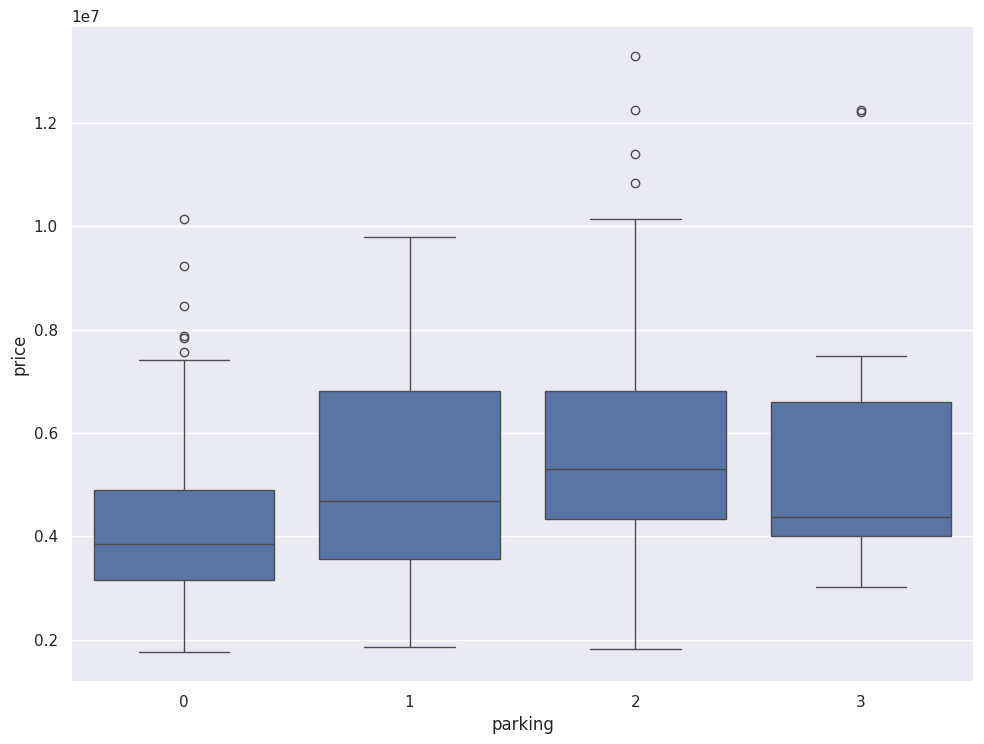

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Function to load dataset
def load_data():
    print("Choose a dataset:")
    print("1. Use sample dataset (Iris)")
    print("2. Upload your own CSV file")
    print("3. Use housing prices dataset (Kaggle)")
    choice = input("Enter 1, 2, or 3: ")

    if choice == '1':
        return sns.load_dataset('iris')
    elif choice == '2':
        try:
            file_path = input("Enter the path to your CSV file: ")
            return pd.read_csv(file_path)
        except Exception as e:
            print(f"Error loading file: {e}")
            sys.exit()
    elif choice == '3':
        try:
            url = "https://raw.githubusercontent.com/YasserH/Housing-Prices-Dataset/main/housing_prices.csv"
            return pd.read_csv(url)
        except Exception as e:
            print(f"Error loading dataset: {e}")
            sys.exit()
    else:
        print("Invalid choice. Exiting.")
        sys.exit()

# Function to handle user inputs and display available variables
def get_variables(data):
    print("Available variables (columns):")
    print(data.columns.tolist())

    while True:
        x_vars = input("Enter the variables for the x-axis (comma separated): ").split(',')
        x_vars = [x.strip() for x in x_vars]  # Clean whitespace

        if all(var in data.columns for var in x_vars):
            break
        else:
            print(f"Invalid columns: {', '.join(set(x_vars) - set(data.columns))}. Try again.")

    y_var = input("Enter the variable for the y-axis: ")
    if y_var not in data.columns:
        print(f"Invalid column: {y_var}. Exiting.")
        sys.exit()

    return x_vars, y_var

# Function to select theme
def select_theme():
    print("\nChoose a theme for the chart:")
    print("1. darkgrid (default)")
    print("2. whitegrid")
    print("3. dark")
    print("4. white")
    print("5. ticks")

    theme_choice = input("Enter the number corresponding to the theme: ")

    themes = {
        '1': 'darkgrid',
        '2': 'whitegrid',
        '3': 'dark',
        '4': 'white',
        '5': 'ticks'
    }

    return themes.get(theme_choice, 'darkgrid')  # Default to 'darkgrid'

# Function to select color palette
def select_palette():
    print("\nChoose a color palette:")
    print("1. deep (default)")
    print("2. muted")
    print("3. bright")
    print("4. pastel")
    print("5. dark")
    print("6. colorblind")

    palette_choice = input("Enter the number corresponding to the color palette: ")

    palettes = {
        '1': 'deep',
        '2': 'muted',
        '3': 'bright',
        '4': 'pastel',
        '5': 'dark',
        '6': 'colorblind'
    }

    return palettes.get(palette_choice, 'deep')  # Default to 'deep'

# Function to handle chart selection and generate plots
def generate_chart(data, x_vars, y_var, theme, palette):
    print("\nChoose a chart type:")
    print("1. Line plot")
    print("2. Scatter plot")
    print("3. Bar plot")
    print("4. Histogram")
    print("5. Box plot")
    print("6. Heatmap (for correlation matrix)")
    print("7. Pie chart (for categorical variables)")
    print("8. Pair plot (for relationships between all variables)")
    print("9. Regression plot (for multiple variables)")
    print("10. Correlation matrix")

    chart_type = input("Enter the number corresponding to the chart type: ")

    # Customizations (color palette, title, labels)
    title = input("Enter the title for the chart (optional, press Enter to skip): ")
    subtitle = input("Enter a subtitle (optional, press Enter to skip): ")
    footer = input("Enter footer text (optional, press Enter to skip): ")

    sns.set_theme(style=theme, palette=palette)  # Apply selected theme and palette

    plt.figure(figsize=(10, 8))

    if chart_type == '1':
        # Line plot
        plt.plot(data[x_vars[0]], data[y_var])
        plt.xlabel(x_vars[0])
        plt.ylabel(y_var)

    elif chart_type == '2':
        # Scatter plot
        sns.scatterplot(x=x_vars[0], y=y_var, data=data)

    elif chart_type == '3':
        # Bar plot
        sns.barplot(x=x_vars[0], y=y_var, data=data)

    elif chart_type == '4':
        # Histogram
        sns.histplot(data[x_vars[0]], bins=20, kde=True)

    elif chart_type == '5':
        # Box plot
        sns.boxplot(x=x_vars[0], y=y_var, data=data)

    elif chart_type == '6':
        # Heatmap for correlation matrix
        corr_matrix = data.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

    elif chart_type == '7':
        # Pie chart (works for categorical data)
        data[x_vars[0]].value_counts().plot.pie(autopct='%1.1f%%')
        plt.ylabel('')  # Hide y-label for pie chart

    elif chart_type == '8':
        # Pair plot (for relationships between all variables)
        sns.pairplot(data)

    elif chart_type == '9':
        # Regression plot with multiple x variables
        for x_var in x_vars:
            sns.regplot(x=data[x_var], y=data[y_var], label=x_var, marker='o')
        plt.legend(title='Independent Variables')
        plt.xlabel("Independent Variables")
        plt.ylabel(y_var)

    elif chart_type == '10':
        # Correlation matrix heatmap
        corr = data.corr()
        sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
        plt.title('Correlation Matrix')

    else:
        print("Invalid chart type selected.")
        return

    # Add title, subtitle, and footer
    if title:
        plt.suptitle(title, fontsize=16, y=1.02)

    if subtitle:
        plt.title(subtitle, fontsize=12, pad=20)

    if footer:
        plt.figtext(0.5, -0.05, footer, ha="center", fontsize=10, color="gray")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for titles
    plt.show()

    # Option to save the plot
    save_option = input("Would you like to save the plot? (y/n): ")
    if save_option.lower() == 'y':
        filename = input("Enter the filename (without extension): ")
        plt.savefig(f"{filename}.png", bbox_inches="tight")
        print(f"Plot saved as {filename}.png")

# Main function to run the program
def main():
    data = load_data()
    x_vars, y_var = get_variables(data)
    theme = select_theme()  # Select a theme via input
    palette = select_palette()  # Select a color palette via input
    generate_chart(data, x_vars, y_var, theme, palette)

if __name__ == "__main__":
    main()
